José Delgado

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df = pd.read_csv("data/training.csv")

# 2. Split Data into Train and Testing to Prevent Data Snooping Bias

In [5]:
train, test = train_test_split(df, test_size=0.3, random_state=1234, stratify=df["Machine Failure"])

# 3. Exploratory Data Analysis

In [6]:
train.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 94,Sensor 95,Sensor 96,Sensor 97,Sensor 98,Sensor 99,Sensor 100,Sensor 101,Sensor 102,Machine Failure
1526,1.382209,0.959569,2.039691,1.631576,1.471266,16.315762,-0.123216,-0.498342,1.487315,26.543901,...,-0.711609,0.745496,-0.102864,-1.016585,0.237203,0.774204,-11.966185,93.582906,14.215192,Running
2814,1.114661,1.753120,0.777757,-1.165778,1.167658,-11.657782,0.838125,-3.917132,2.405440,13.810468,...,5.063426,-5.304542,0.682722,7.233466,-1.687809,-1.067554,-7.777302,-42.982352,14.511462,Running
6488,0.919949,-0.244303,0.442553,-0.542031,0.603301,-5.420310,1.906050,-0.214311,0.124462,10.368780,...,3.446293,-3.610402,0.890708,4.923276,-1.148764,0.163332,11.428224,-34.112278,14.363741,Running
66,0.563256,0.441737,-0.355619,-0.392601,3.242510,-3.926010,1.755904,-2.863108,2.491936,27.802933,...,4.585939,-4.804317,1.280206,6.551342,-1.528646,0.465513,29.378841,-1.431505,14.443738,Running
6077,1.784603,1.021679,2.323915,0.556113,-1.850188,5.561133,1.123146,-0.006424,-0.006171,1.863274,...,7.522060,-7.880253,1.340799,10.745799,-2.507353,0.596541,23.461976,24.837348,14.459019,Running


## Bird's Eye Overview

In [7]:
train["Machine Failure"].value_counts(normalize=True)

Machine Failure
Running    0.863268
Failure    0.136732
Name: proportion, dtype: float64

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
train.describe()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24,Sensor 25,Sensor 26,Sensor 27,Sensor 28,Sensor 29,Sensor 30,Sensor 31,Sensor 32,Sensor 33,Sensor 34,Sensor 35,Sensor 36,Sensor 37,Sensor 38,Sensor 39,Sensor 40,Sensor 41,Sensor 42,Sensor 43,Sensor 44,Sensor 45,Sensor 46,Sensor 47,Sensor 48,Sensor 49,Sensor 50,Sensor 51,Sensor 52,Sensor 53,Sensor 54,Sensor 55,Sensor 56,Sensor 57,Sensor 58,Sensor 59,Sensor 60,Sensor 61,Sensor 62,Sensor 63,Sensor 64,Sensor 65,Sensor 66,Sensor 67,Sensor 68,Sensor 69,Sensor 70,Sensor 71,Sensor 72,Sensor 73,Sensor 74,Sensor 75,Sensor 76,Sensor 77,Sensor 78,Sensor 79,Sensor 80,Sensor 81,Sensor 82,Sensor 83,Sensor 84,Sensor 85,Sensor 86,Sensor 87,Sensor 88,Sensor 89,Sensor 90,Sensor 91,Sensor 92,Sensor 93,Sensor 94,Sensor 95,Sensor 96,Sensor 97,Sensor 98,Sensor 99,Sensor 100,Sensor 101,Sensor 102
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4.571000e+03,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4.571000e+03,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,1.017857,0.987795,0.997633,1.007020,0.986144,10.070205,1.036881,1.638584,0.963613,14.714748,16.343000,14.908261,2.357374,2.984878e+00,1.007779,14.714748,16.343000,14.908261,2.357374,2.984878e+00,1.007779,1.005972,1.034620,1.012852,1.008781,10.152158,10.152033,10.150611,14.286539,14.286461,14.285442,17.468247,17.468187,17.467351,20.153734,20.153683,20.152958,4.871498,5.107285,1.005360,1.015729,0.986144,1.001372,0.981653,0.956550,1.005444,0.986144,0.999324,0.968234,1.207166,0.510729,0.956168,0.956168,0.638479,0.593558,3.731680,11.211629,1.002373,0.992859,1.011089,0.992396,0.984685,0.988718,1.023633,1.012122,5.955212,7.146254,8.575505,10.290606,12.348727,14.818473,17.782167,21.338601,25.606321,30.727585,36.873102,44.247723,53.097267,1.011652,1.021844,1.014178,1.014178,1.014178,1.014178,1.014178,1.014178,1.014178,1.011044,3.065531,0.985513,1.014776,9.955648,1.999458,2.099431,-2.199404,1.011089,2.999187,-0.699810,1.038502,14.908261,44.247723,14.285442
std,0.979800,0.990494,0.998358,1.001622,1.024145,10.016223,1.012838,4.391955,1.003892,15.213086,16.072047,14.989871,7.606543,4.178067e+00,1.005145,15.213086,16.072047,14.989871,7.606543,4.178067e+00,1.005145,0.996170,0.993661,1.010078,0.999609,0.160932,0.129425,0.127920,0.147089,0.110368,0.109676,0.147588,0.110543,0.110225,0.151874,0.115965,0.115842,4.989832,5.001586,0.989607,1.006747,1.024145,1.002780,0.994952,2.659555,2.676400,1.024145,5.169530,3.773903,1.195404,0.500159,2.569771,2.569771,4.671763,3.062522,16.739077,11.133298,1.005643,0.982789,1.004734,1.003811,0.996099,0.989616,0.996791,0.993013,6.029295,7.235154,8.682185,10.418622,12.502346,15.002816,18.003379,21.604054,25.924865,31.109838,37.331806,44.798167,53.757801,1.000864,1.000314,1.003888,1.003888,1.003888,1.003888,

In [11]:
train.dtypes

Sensor 1           float64
Sensor 2           float64
Sensor 3           float64
Sensor 4           float64
Sensor 5           float64
Sensor 6           float64
Sensor 7           float64
Sensor 8           float64
Sensor 9           float64
Sensor 10          float64
Sensor 11          float64
Sensor 12          float64
Sensor 13          float64
Sensor 14          float64
Sensor 15          float64
Sensor 16          float64
Sensor 17          float64
Sensor 18          float64
Sensor 19          float64
Sensor 20          float64
Sensor 21          float64
Sensor 22          float64
Sensor 23          float64
Sensor 24          float64
Sensor 25          float64
Sensor 26          float64
Sensor 27          float64
Sensor 28          float64
Sensor 29          float64
Sensor 30          float64
Sensor 31          float64
Sensor 32          float64
Sensor 33          float64
Sensor 34          float64
Sensor 35          float64
Sensor 36          float64
Sensor 37          float64
S

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4571 entries, 1526 to 4397
Columns: 103 entries, Sensor 1 to Machine Failure
dtypes: float64(102), object(1)
memory usage: 3.6+ MB


## Take a Look at Distributions

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Machine Failure'>

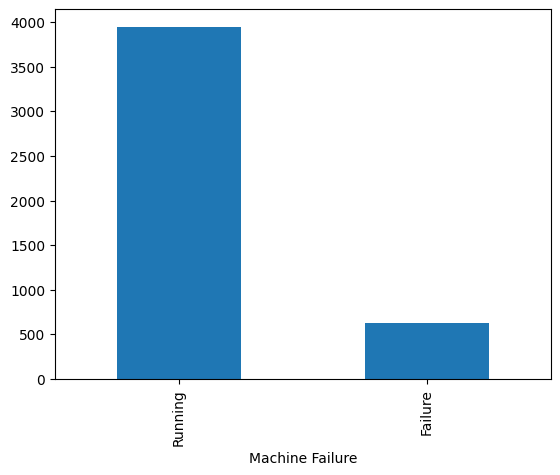

In [14]:
train["Machine Failure"].value_counts().plot(kind="bar")

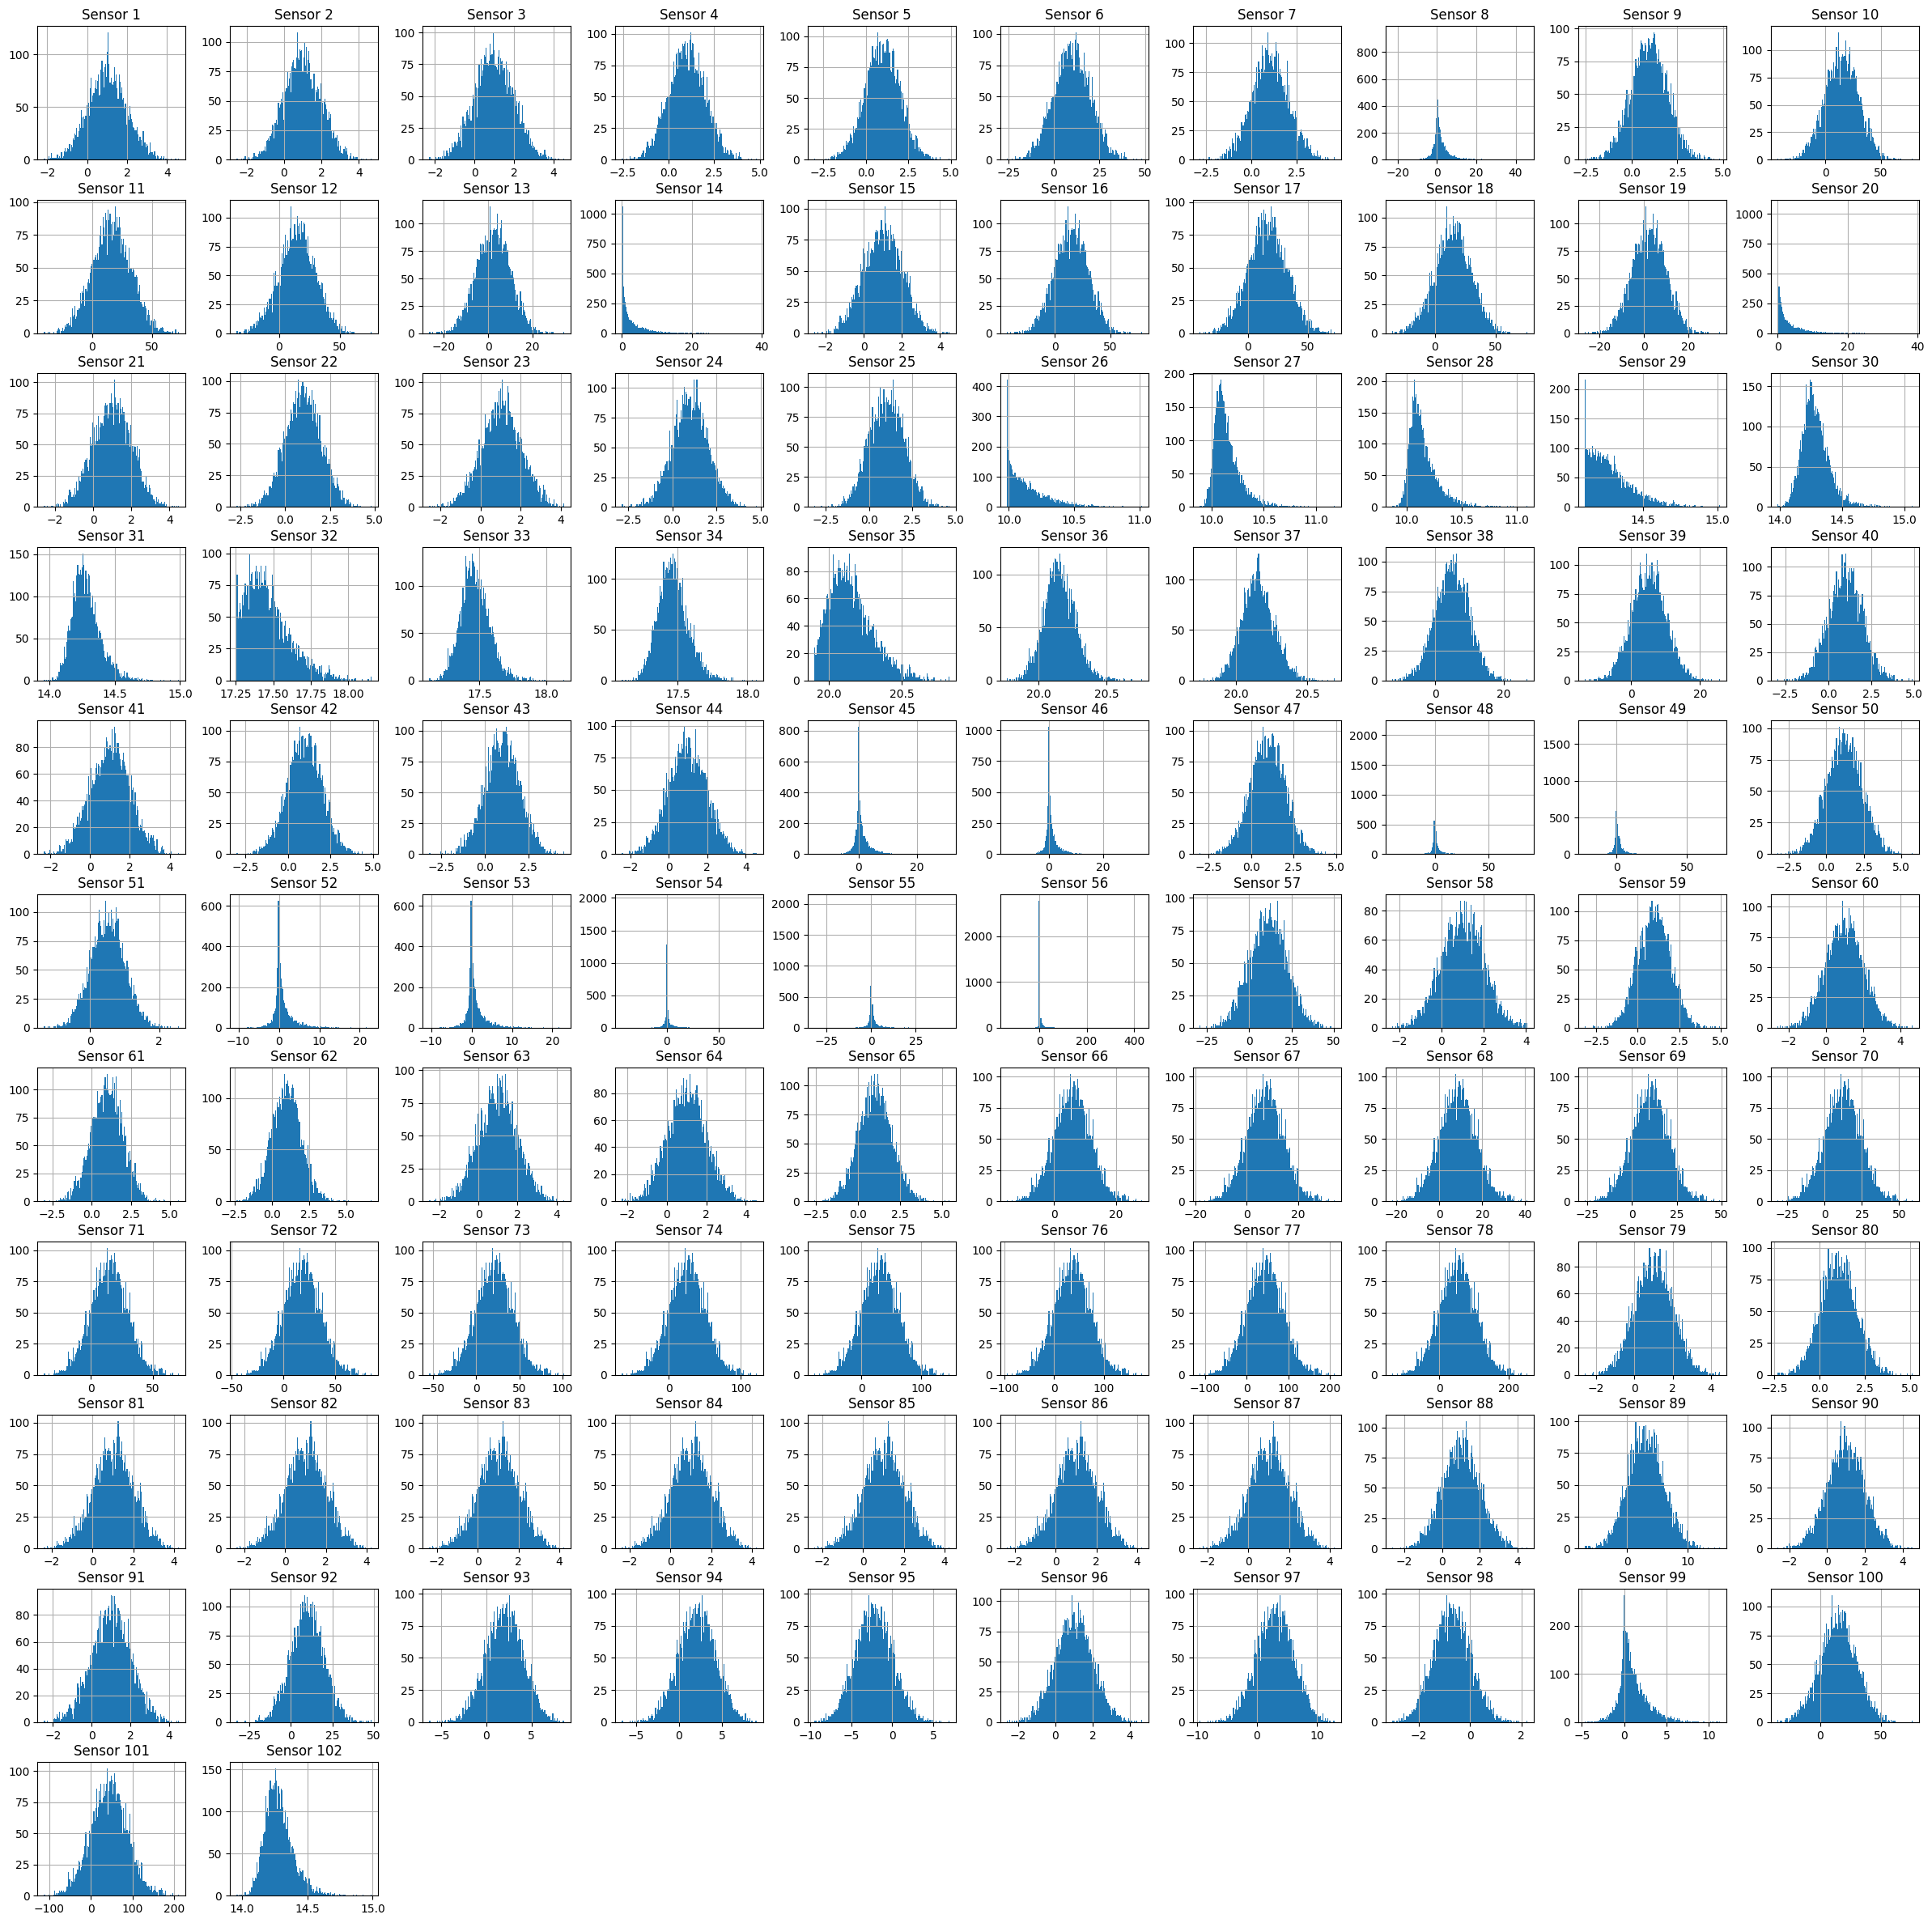

In [21]:
train.hist(bins=150, figsize=(30,30))
plt.show()

## View Correlation

In [35]:
train.select_dtypes(exclude="object").corr()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24,Sensor 25,Sensor 26,Sensor 27,Sensor 28,Sensor 29,Sensor 30,Sensor 31,Sensor 32,Sensor 33,Sensor 34,Sensor 35,Sensor 36,Sensor 37,Sensor 38,Sensor 39,Sensor 40,Sensor 41,Sensor 42,Sensor 43,Sensor 44,Sensor 45,Sensor 46,Sensor 47,Sensor 48,Sensor 49,Sensor 50,Sensor 51,Sensor 52,Sensor 53,Sensor 54,Sensor 55,Sensor 56,Sensor 57,Sensor 58,Sensor 59,Sensor 60,Sensor 61,Sensor 62,Sensor 63,Sensor 64,Sensor 65,Sensor 66,Sensor 67,Sensor 68,Sensor 69,Sensor 70,Sensor 71,Sensor 72,Sensor 73,Sensor 74,Sensor 75,Sensor 76,Sensor 77,Sensor 78,Sensor 79,Sensor 80,Sensor 81,Sensor 82,Sensor 83,Sensor 84,Sensor 85,Sensor 86,Sensor 87,Sensor 88,Sensor 89,Sensor 90,Sensor 91,Sensor 92,Sensor 93,Sensor 94,Sensor 95,Sensor 96,Sensor 97,Sensor 98,Sensor 99,Sensor 100,Sensor 101,Sensor 102
Sensor 1,1.000000,0.002177,-0.023029,-0.019148,0.006688,-0.019148,0.009218,-0.006095,0.002669,-0.002226,0.003729,-0.006835,-0.002226,0.023221,-0.011308,-0.002226,0.003729,-0.006835,-0.002226,0.023221,-0.011308,0.006711,-0.006857,-0.018035,0.004340,-0.005732,-0.017520,0.001648,-0.006047,-0.016755,-0.000839,-0.006242,-0.015445,-0.002462,-0.006368,-0.014219,-0.003495,0.017204,0.023416,0.016673,0.020507,0.006688,0.019218,-0.007917,0.023480,0.005004,0.006688,0.012110,0.009804,0.006711,0.023416,0.016869,0.016869,-0.001492,0.004886,0.033751,-0.010505,0.002945,0.005345,0.005496,0.007576,0.023545,-0.010245,-0.005977,0.001259,-0.006850,-0.006850,-0.006850,-0.006850,-0.006850,-0.006850,-0.006850,-0.006850,-0.006850,-0.006850,-0.006850,-0.006850,-0.006850,0.027220,0.025179,0.022202,0.022202,0.022202,0.022202,0.022202,0.022202,0.022202,-0.001751,0.025179,-0.000970,-0.012354,0.005551,-0.003024,-0.003024,0.003024,0.005496,-0.003024,0.003024,0.022745,-0.006835,-0.006850,-0.000839
Sensor 2,0.002177,1.000000,-0.005378,-0.003468,-0.027391,-0.003468,0.008217,0.001050,0.004734,0.030003,-0.019261,0.031213,0.030003,-0.029930,0.003519,0.030003,-0.019261,0.031213,0.030003,-0.029930,0.003519,0.005797,0.008948,-0.006195,0.027365,0.013025,-0.001696,0.036629,0.012312,0.001355,0.033324,0.011775,0.003387,0.029457,0.011373,0.004687,0.026206,0.030125,0.046244,0.024585,0.006151,-0.027391,0.023466,-0.006621,0.003963,0.004619,-0.027391,-0.009840,-0.011537,0.005797,0.046244,-0.015434,-0.015434,-0.008890,-0.005258,-0.000556,0.007081,-0.001561,0.006557,0.008499,0.017588,-0.010308,-0.002846,0.006097,-0.001466,-0.009537,-0.009537,-0.009537,-0.009537,-0.009537,-0.009537,-0.009537,-0.009537,-0.009537,-0.009537,-0.009537,-0.009537,-0.009537,-0.007531,0.010826,-0.006416,-0.006416,-0.006416,-0.006416,-0.006416,-0.006416,-0.006416,0.031691,0.010826,0.016117,-0.017825,0.008623,0.022660,0.022660,-0.022660,0.008499,0.022660,-0.022660,0.002331,0.031213,-0.009537,0.033324
Sensor 3,-0.023029,-0.005378,1.000000,-0.018443,-0.009199,-0.018443,0.004644,-0.001844,-0.005735,-0.004394,0.010212,0.010709,-0.004394,0.004866,0.008419,-0.004394,0.010212,0.010709,-0.004394,0.004866,0.008419,0.016443,0.003346,-0.026942,0.022418,0.010973,-0.027563,0.020275,0.009393,-0.022019,0.017928,0.008313,-0.017159,0.015460,0.007544,-0.013490,0.013458,0.017062,-0.013369,0.009423,-0.016556,-0.009199,0.016176,0.010002,-0.011066,-0.005823,-0.009199,-0.026383,-0.018692,0.016443,-0.013369,-0.001754,-0.001754,-0.004439,0.003112,0.004317,-0.008380,0.006895,0.020521,-0.008277,0.013409,0.011624,-0.003340,-0.016443,0.017873,0.014940,0.014940,0.014940,0.014940,0.014940,0.014940,0.014940,0.014940,0.014940,0.014940,0.014940,0.014940,0.014940,0.000488,-0.007653,0.007641,0.007641,0.007641,0.007641,0.007641,0.007641,0.007641,0.008572,-0.007653,0.019674,-0.023724,-0.009084,0.018522,0.018522,-0.018522,-0.008277,0.018522,-0.018522,0.000610,0.010709,0.014940,0.017928
Sensor 4,-0.019148,-0.003468,-0.018443,1.000000,-0.004886,1.0000

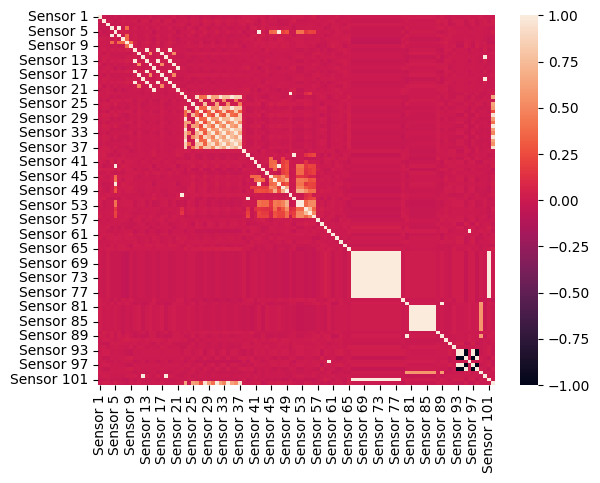

In [30]:
sns.heatmap(train.select_dtypes(exclude="object").corr())
plt.show()

In [25]:
temp = train.copy()
temp["OneHotTarget"] = temp["Machine Failure"].apply(lambda x: 1 if x == "Failure" else 0)

In [27]:
temp["OneHotTarget"].value_counts(normalize=True)

OneHotTarget
0    0.863268
1    0.136732
Name: proportion, dtype: float64

In [28]:
temp.select_dtypes(exclude="object").corr()["OneHotTarget"].sort_values(ascending=False)

OneHotTarget    1.000000
Sensor 78       0.613889
Sensor 68       0.613889
Sensor 74       0.613889
Sensor 66       0.613889
Sensor 69       0.613889
Sensor 76       0.613889
Sensor 72       0.613889
Sensor 71       0.613889
Sensor 67       0.613889
Sensor 77       0.613889
Sensor 101      0.613889
Sensor 75       0.613889
Sensor 70       0.613889
Sensor 73       0.613889
Sensor 100      0.091782
Sensor 12       0.091782
Sensor 18       0.091782
Sensor 13       0.084801
Sensor 19       0.084801
Sensor 10       0.084801
Sensor 16       0.084801
Sensor 17       0.074137
Sensor 11       0.074137
Sensor 53       0.055532
Sensor 52       0.055532
Sensor 56       0.050904
Sensor 14       0.040860
Sensor 20       0.040860
Sensor 5        0.040272
Sensor 47       0.040272
Sensor 42       0.040272
Sensor 57       0.035638
Sensor 45       0.033526
Sensor 46       0.033157
Sensor 41       0.030593
Sensor 92       0.026523
Sensor 49       0.026421
Sensor 4        0.026254
Sensor 6        0.026254


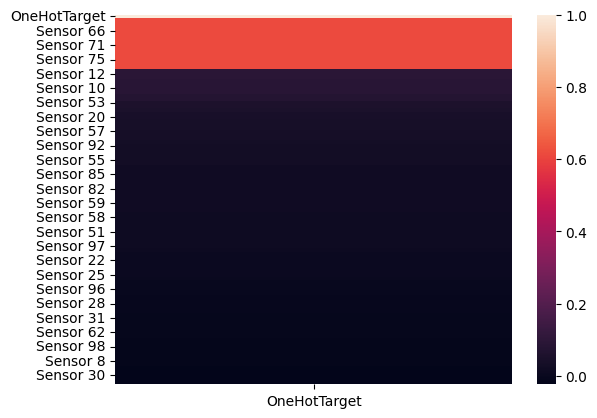

In [34]:
sns.heatmap(temp.select_dtypes(exclude="object").corr()["OneHotTarget"].sort_values(ascending=False).to_frame())
plt.show()

## Is the target balanced?